1. What is the training accuracy? What is the testing accuracy? Do you think your model overfits? How many iteration did it take to converge?

        For the training without regularization, training accuracy reached 100%. I believe that my model did not overfit since the accuracy on the testing data is 99.945%. It took 47 iterations for the model to converge.

2. Take a look at the trained model parameters. Which features have the largest weights in absolute value? These are potentially most informative features for the trained model. Do they make sense? Why?

        The top 10 features that have the largest weight are: 
                1. dst_host_serror_rate: % of connections to current host that have an S0 error.
                2. dst_host_diff_srv_rate: % of different services on current host.
                3. dst_host_rerror_rate: % of connections to current host that have an RST error.
                4. diff_srv_rate: % of connections to diﬀerent services.
                5. dst_host_same_src_port_rate: % of connections to current host having same src port.
                6. rerror_rate: % of connections that have ‘REJ’ errors.
                7. dst_host_same_srv_rate: % of connections having same dst port and using same service.
                8. srv_count: number of connections to same service as current connection in past two seconds.
                9. protocol_type_udp: connection protocol (tcp, udp, icmp).
                10. count: number of connections to same host as current connection in past two seconds.

        Probing attacks, for example, IPsweep and Portsweep, as their names suggest, sweep through IP addresses and port numbers for a victim network and host respectively looking for open ports, that could potentially be used later in an attack. The features that have large weights are related to these approach.

3. Train model with L1 and L2 regularization. Compare the accuracies for L1 and L2 and plot the feature weights. 

        Model with L1 regularization: Train Accuracy: 0.9999087646736816
                                      Test Accuracy: 0.9998783454987834
                                      Iterations: 13
        Model with L2 regularization(default strength): Train Accuracy: 0.9999391764491211
                                      Test Accuracy: 0.9996350364963503
                                      Iterations: 11
                                
4. Try different strengths for L2 regularization. (You can use values .001, .01,.1,1,10 etc.)  Show how the train and test accuracy varies with different regularization strengths. Explain your results.

        The parameter for regularization strength is C(smaller values specify stronger regularization.)
        C = 10: Train Accuracy: 1.0
                Test Accuracy: 0.9995742092457421
                Iterations: 11
        C = 1: Train Accuracy: 0.9999391764491211
                Test Accuracy: 0.9996350364963503
                Iterations: 11
        C = 0.1: Train Accuracy: 0.9997719116842041
                 Test Accuracy: 0.9995742092457421
                 Iterations: 9
        C = 0.01: Train Accuracy: 0.9989203819718995
                  Test Accuracy: 0.9985401459854014
                  Iterations: 8
        C = 0.001: Train Accuracy: 0.998175293473633
                   Test Accuracy: 0.9971411192214112
                   Iterations: 6
        As the regularization strengthens, the final accuracies of the model lowers, but the model converges faster. The weights of the model also lowers as regularization strengthens.
        The high strength of regularization stops the model from overfitting thus having lower accuracy in training data.





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import scale
import heapq

In [3]:
features = ['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'label'
]

In [4]:
#Read data
data = pd.read_csv('kddcup.data', names=features, header=None)
print('The no of data points are:',data.shape[0])
print('='*40)
print('The no of features are:',data.shape[1])
print('='*40)
print('Some of the features are:',features[:10])
data.head()

The no of data points are: 4898431
The no of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
#Drop normal datas
data = data[data['label']!='normal.']
data['label'].value_counts()

label
smurf.              2807886
neptune.            1072017
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [6]:
#Change labels to probe & not_probe classes
data = data.replace(['ipsweep.','nmap.','portsweep.','satan.'], 'probe')
data = data.replace(['back.','buffer_overflow.','ftp_write.','guess_passwd.','imap.','land.','loadmodule.','multihop.','neptune.','perl.','phf.','pod.','rootkit.','smurf.','spy.','teardrop.','warezclient.','warezmaster.'], 'not_probe')
data['label'].value_counts()

label
not_probe    3884548
probe          41102
Name: count, dtype: int64

In [7]:
#One hot encoding categorical variables
enc = OneHotEncoder(handle_unknown='ignore')
cat_col = ['protocol_type','service','flag']
data = pd.get_dummies(data, columns=cat_col)
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
7448,184,1511,2957,0,0,0,3,0,1,2,...,False,False,False,False,False,False,False,False,True,False
7449,305,1735,2766,0,0,0,3,0,1,2,...,False,False,False,False,False,False,False,False,True,False
40481,79,281,1301,0,0,0,2,0,1,1,...,False,False,False,False,False,False,False,False,True,False
41114,25,269,2333,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
75985,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [8]:
#Split data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('label', axis=1), data['label'], stratify=data['label'], test_size=0.2, random_state=42)
Y_train.value_counts()

label
not_probe    3107638
probe          32882
Name: count, dtype: int64

In [9]:
#under sample the majority class 
undersampler = RandomUnderSampler(random_state=42)
X_train_res, Y_train_res = undersampler.fit_resample(X_train, Y_train)
X_test_res, Y_test_res = undersampler.fit_resample(X_test, Y_test)
print(Y_train_res.value_counts())
print(Y_test_res.value_counts())

label
not_probe    32882
probe        32882
Name: count, dtype: int64
label
not_probe    8220
probe        8220
Name: count, dtype: int64


In [10]:
#Standardize dataset
X_train_res = scale(X_train_res)
X_test_res = scale(X_test_res)

In [11]:
#no regularization training
logreg = LogisticRegression(solver='lbfgs', max_iter=600, penalty=None)
logreg.fit(X_train_res, Y_train_res)


# Calculate accuracy on training data
print('Train Accuracy: '+str(logreg.score(X_train_res, Y_train_res)))

# Calculate accuracy on y=testing data
print('Test Accuracy: '+str(logreg.score(X_test_res, Y_test_res)))

#Iterations
print('Iterations: '+str(logreg.n_iter_))

Train Accuracy: 1.0
Test Accuracy: 0.9994525547445255
Iterations: [47]


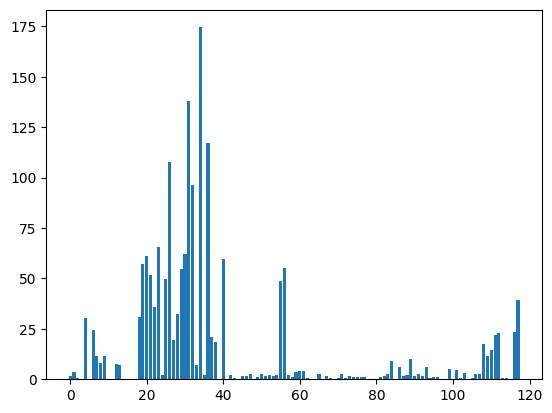

dst_host_serror_rate
dst_host_diff_srv_rate
dst_host_rerror_rate
diff_srv_rate
dst_host_same_src_port_rate
rerror_rate
dst_host_same_srv_rate
srv_count
protocol_type_udp
count


In [12]:
importance = np.abs(logreg.coef_[0])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Get features that have the largest weights in absolute value
list = heapq.nlargest(10, range(len(importance)), importance.take)
for i in list:
    print(X_test.columns[i])

In [13]:
#L1 regularization
logreg = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l1')
logreg.fit(X_train_res, Y_train_res)

# Calculate accuracy on training data
print('Train Accuracy: '+str(logreg.score(X_train_res, Y_train_res)))

# Calculate accuracy on y=testing data
print('Test Accuracy: '+str(logreg.score(X_test_res, Y_test_res)))

#Iterations
print('Iterations: '+str(logreg.n_iter_))

Train Accuracy: 0.9999087646736816
Test Accuracy: 0.9998783454987834
Iterations: [13]


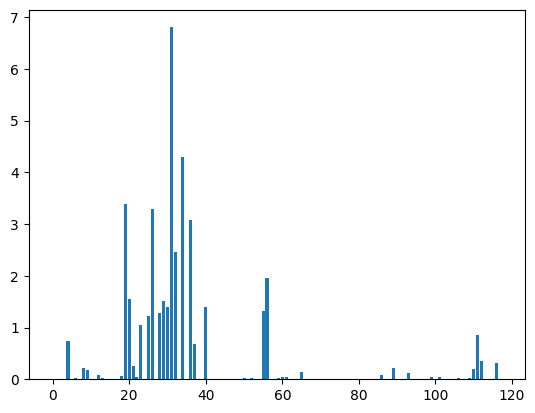

dst_host_diff_srv_rate
dst_host_serror_rate
count
diff_srv_rate
dst_host_rerror_rate
dst_host_same_src_port_rate
service_ecr_i
srv_count
dst_host_srv_count
dst_host_same_srv_rate


In [14]:
importance = np.abs(logreg.coef_[0])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Get features that have the largest weights in absolute value
list = heapq.nlargest(10, range(len(importance)), importance.take)
for i in list:
    print(X_test.columns[i])

In [16]:
#L2 regularization, strength of regularization: 10(smaller values specify stronger regularization.)
logreg = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2', C=10)
logreg.fit(X_train_res, Y_train_res)

# Calculate accuracy on training data
print('Train Accuracy: '+str(logreg.score(X_train_res, Y_train_res)))

# Calculate accuracy on y=testing data
print('Test Accuracy: '+str(logreg.score(X_test_res, Y_test_res)))

#Iterations
print('Iterations: '+str(logreg.n_iter_))

Train Accuracy: 1.0
Test Accuracy: 0.9995742092457421
Iterations: [11]


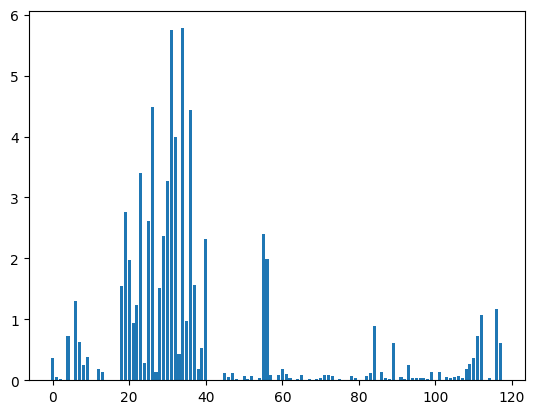

dst_host_serror_rate
dst_host_diff_srv_rate
diff_srv_rate
dst_host_rerror_rate
dst_host_same_src_port_rate
rerror_rate
dst_host_same_srv_rate
count
same_srv_rate
service_eco_i


In [17]:
importance = np.abs(logreg.coef_[0])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Get features that have the largest weights in absolute value
list = heapq.nlargest(10, range(len(importance)), importance.take)
for i in list:
    print(X_test.columns[i])

In [18]:
#L2 regularization, strength of regularization: 1(smaller values specify stronger regularization.)
logreg = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2', C=1)
logreg.fit(X_train_res, Y_train_res)

# Calculate accuracy on training data
print('Train Accuracy: '+str(logreg.score(X_train_res, Y_train_res)))

# Calculate accuracy on y=testing data
print('Test Accuracy: '+str(logreg.score(X_test_res, Y_test_res)))

#Iterations
print('Iterations: '+str(logreg.n_iter_))

Train Accuracy: 0.9999391764491211
Test Accuracy: 0.9996350364963503
Iterations: [11]


In [19]:
#L2 regularization, strength of regularization: 0.1(smaller values specify stronger regularization.)
logreg = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2', C=0.1)
logreg.fit(X_train_res, Y_train_res)

# Calculate accuracy on training data
print('Train Accuracy: '+str(logreg.score(X_train_res, Y_train_res)))

# Calculate accuracy on y=testing data
print('Test Accuracy: '+str(logreg.score(X_test_res, Y_test_res)))

#Iterations
print('Iterations: '+str(logreg.n_iter_))

Train Accuracy: 0.9997719116842041
Test Accuracy: 0.9995742092457421
Iterations: [9]


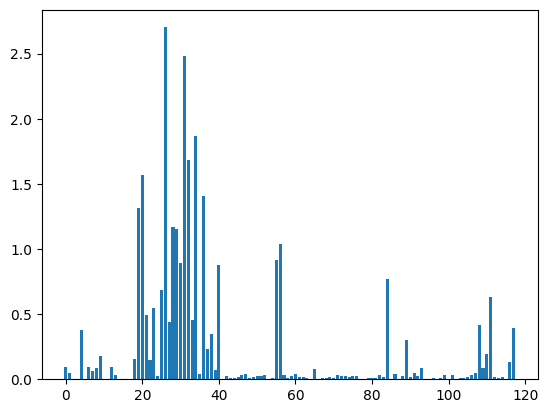

diff_srv_rate
dst_host_diff_srv_rate
dst_host_serror_rate
dst_host_same_src_port_rate
srv_count
dst_host_rerror_rate
count
dst_host_count
dst_host_srv_count
service_ecr_i


In [20]:
importance = np.abs(logreg.coef_[0])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Get features that have the largest weights in absolute value
list = heapq.nlargest(10, range(len(importance)), importance.take)
for i in list:
    print(X_test.columns[i])

In [21]:
#L2 regularization, strength of regularization: 0.01(smaller values specify stronger regularization.)
logreg = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2', C=0.01)
logreg.fit(X_train_res, Y_train_res)

# Calculate accuracy on training data
print('Train Accuracy: '+str(logreg.score(X_train_res, Y_train_res)))

# Calculate accuracy on y=testing data
print('Test Accuracy: '+str(logreg.score(X_test_res, Y_test_res)))

#Iterations
print('Iterations: '+str(logreg.n_iter_))

Train Accuracy: 0.9989203819718995
Test Accuracy: 0.9985401459854014
Iterations: [8]


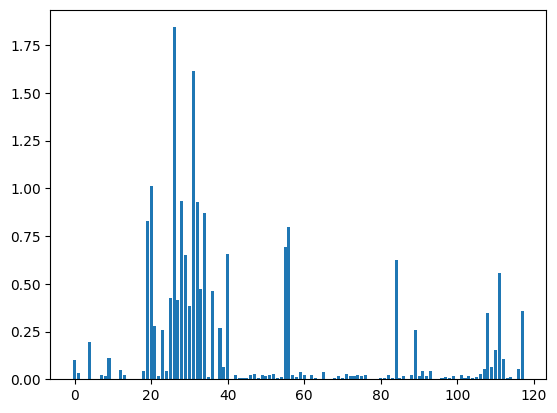

diff_srv_rate
dst_host_diff_srv_rate
srv_count
dst_host_count
dst_host_same_src_port_rate
dst_host_serror_rate
count
service_ecr_i
service_eco_i
protocol_type_udp


In [22]:
importance = np.abs(logreg.coef_[0])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Get features that have the largest weights in absolute value
list = heapq.nlargest(10, range(len(importance)), importance.take)
for i in list:
    print(X_test.columns[i])

In [23]:
#L2 regularization, strength of regularization: 0.001(smaller values specify stronger regularization.)
logreg = LogisticRegression(solver='liblinear', max_iter=10000, penalty='l2', C=0.001)
logreg.fit(X_train_res, Y_train_res)



# Calculate accuracy on training data
print('Train Accuracy: '+str(logreg.score(X_train_res, Y_train_res)))

# Calculate accuracy on y=testing data
print('Test Accuracy: '+str(logreg.score(X_test_res, Y_test_res)))

#Iterations
print('Iterations: '+str(logreg.n_iter_))

Train Accuracy: 0.998175293473633
Test Accuracy: 0.9971411192214112
Iterations: [6]


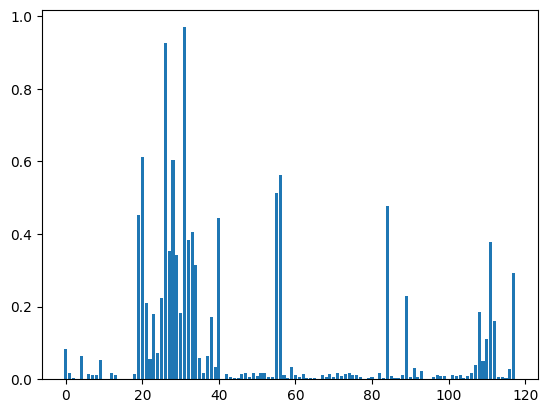

dst_host_diff_srv_rate
diff_srv_rate
srv_count
dst_host_count
service_ecr_i
service_eco_i
service_other
count
protocol_type_udp
dst_host_srv_diff_host_rate


In [24]:
importance = np.abs(logreg.coef_[0])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Get features that have the largest weights in absolute value
list = heapq.nlargest(10, range(len(importance)), importance.take)
for i in list:
    print(X_test.columns[i])